C:\Users\PC COMPUTER\AppData\Local\Temp\ipykernel_25968\3052822613.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = int(mat_contents['m'])
C:\Users\PC COMPUTER\AppData\Local\Temp\ipykernel_25968\3052822613.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = int(mat_contents['n'])


Zachowanie >35.0% informacji wymaga r = 42 składowych głównych.
Uzyskana część informacji: 35.27%


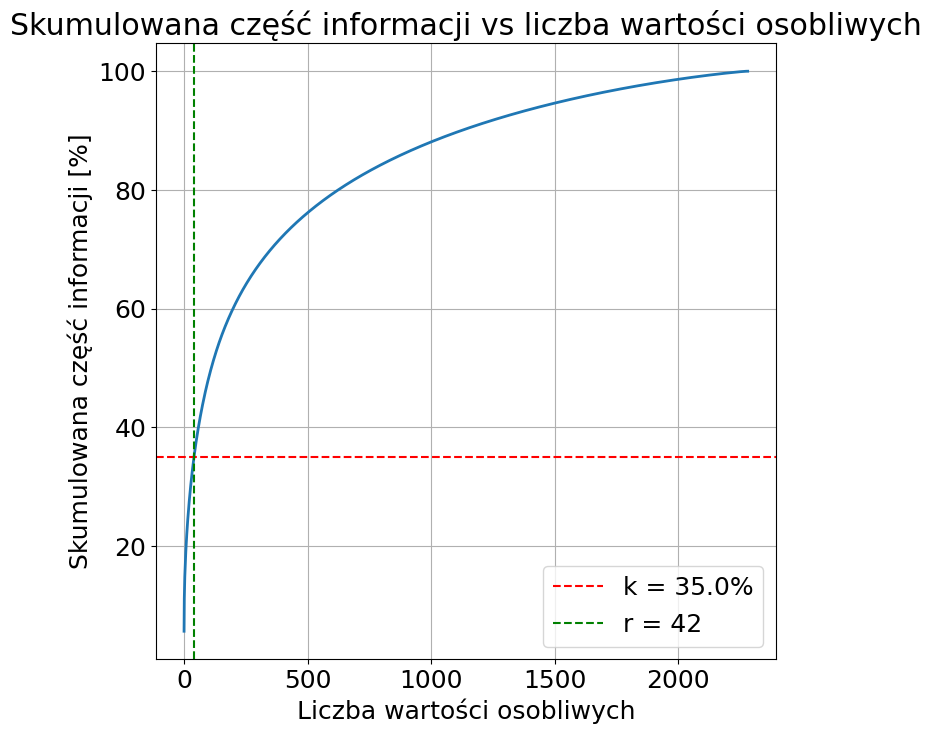

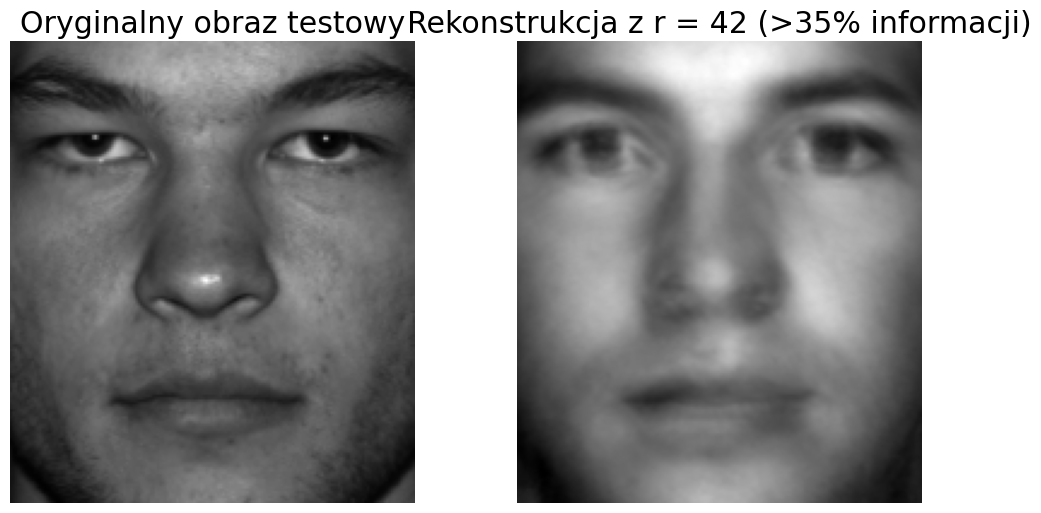

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

# Wczytanie danych
mat_contents = scipy.io.loadmat(os.path.join('allFaces.mat'))
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

# Użycie pierwszych 36 twarzy do treningu
trainingFaces = faces[:, :np.sum(nfaces[:36])]
avgFace = np.mean(trainingFaces, axis=1)

# Obliczenie eigenfaces na danych treningowych po odjęciu średniej
X = trainingFaces - np.tile(avgFace, (trainingFaces.shape[1], 1)).T
U, S, VT = np.linalg.svd(X, full_matrices=False)

# Znalezienie r dla k=35%
cumulative_info = np.cumsum(S) / np.sum(S)  # skumulowana suma wartości osobliwych (informacji)
k_threshold = 0.35  # 35%
r = np.argmax(cumulative_info > k_threshold) + 1  # najmniejsze r, dla którego przekraczamy 35%

print(f'Zachowanie >{k_threshold*100}% informacji wymaga r = {r} składowych głównych.')
print(f'Uzyskana część informacji: {cumulative_info[r-1]*100:.2f}%')

# Wykres skumulowanej informacji
plt.figure()
plt.plot(cumulative_info * 100, linewidth=2)
plt.axhline(y=k_threshold*100, color='r', linestyle='--', label=f'k = {k_threshold*100}%')
plt.axvline(x=r, color='g', linestyle='--', label=f'r = {r}')
plt.xlabel('Liczba wartości osobliwych')
plt.ylabel('Skumulowana część informacji [%]')
plt.title('Skumulowana część informacji vs liczba wartości osobliwych')
plt.legend()
plt.grid(True)
plt.show()

# Rekonstrukcja twarzy testowej (pierwsza twarz osoby 37)
testFace = faces[:, np.sum(nfaces[:36])]  # Pierwsza twarz osoby 37
testFaceMS = testFace - avgFace

# Rekonstrukcja przy użyciu r eigenfaces
reconFace = avgFace + U[:, :r] @ (U[:, :r].T @ testFaceMS)

# Wizualizacja
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Oryginalny obraz
axes[0].imshow(np.reshape(testFace, (m, n)).T, cmap='gray')
axes[0].set_title('Oryginalny obraz testowy')
axes[0].axis('off')

# Odtworzony obraz
axes[1].imshow(np.reshape(reconFace, (m, n)).T, cmap='gray')
axes[1].set_title(f'Rekonstrukcja z r = {r} (>35% informacji)')
axes[1].axis('off')

plt.show()